In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Change this import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

# Show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import the data
df = pd.read_csv('diabetes_prediction_dataset.csv')

count_0 = df['diabetes'].value_counts()[0]
count_1 = df['diabetes'].value_counts()[1]

# Randomly sample rows with 'diabetes' value 0 to match the count of 1s
if count_0 > count_1:
    df = pd.concat([df[df['diabetes'] == 0].sample(n=count_1, random_state=42), df[df['diabetes'] == 1]])
elif count_1 > count_0:
    df = pd.concat([df[df['diabetes'] == 1].sample(n=count_0, random_state=42), df[df['diabetes'] == 0]])

# randomly delete columns with bmi level of 27.32 until 250 samples left
while len(df[df['bmi'] == 27.32]) > 200:
    df = df.drop(df[df['bmi'] == 27.32].sample(n=1, random_state=42).index)

# Shuffle the DataFrame to mix the rows
df = df.sample(frac=1, random_state=42)

# df = df.drop(df.columns[-1], axis=1)

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])

df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
115,Male,28.00,0,0,never,27.63,6.2,130,0,1,4
98190,Female,43.00,0,0,never,39.61,5.8,155,1,0,4
69762,Male,0.32,0,0,No Info,16.20,6.6,80,0,1,0
65292,Female,45.00,0,0,never,24.10,5.8,90,0,0,4
6874,Male,70.00,0,1,former,28.87,6.0,155,1,1,3


C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


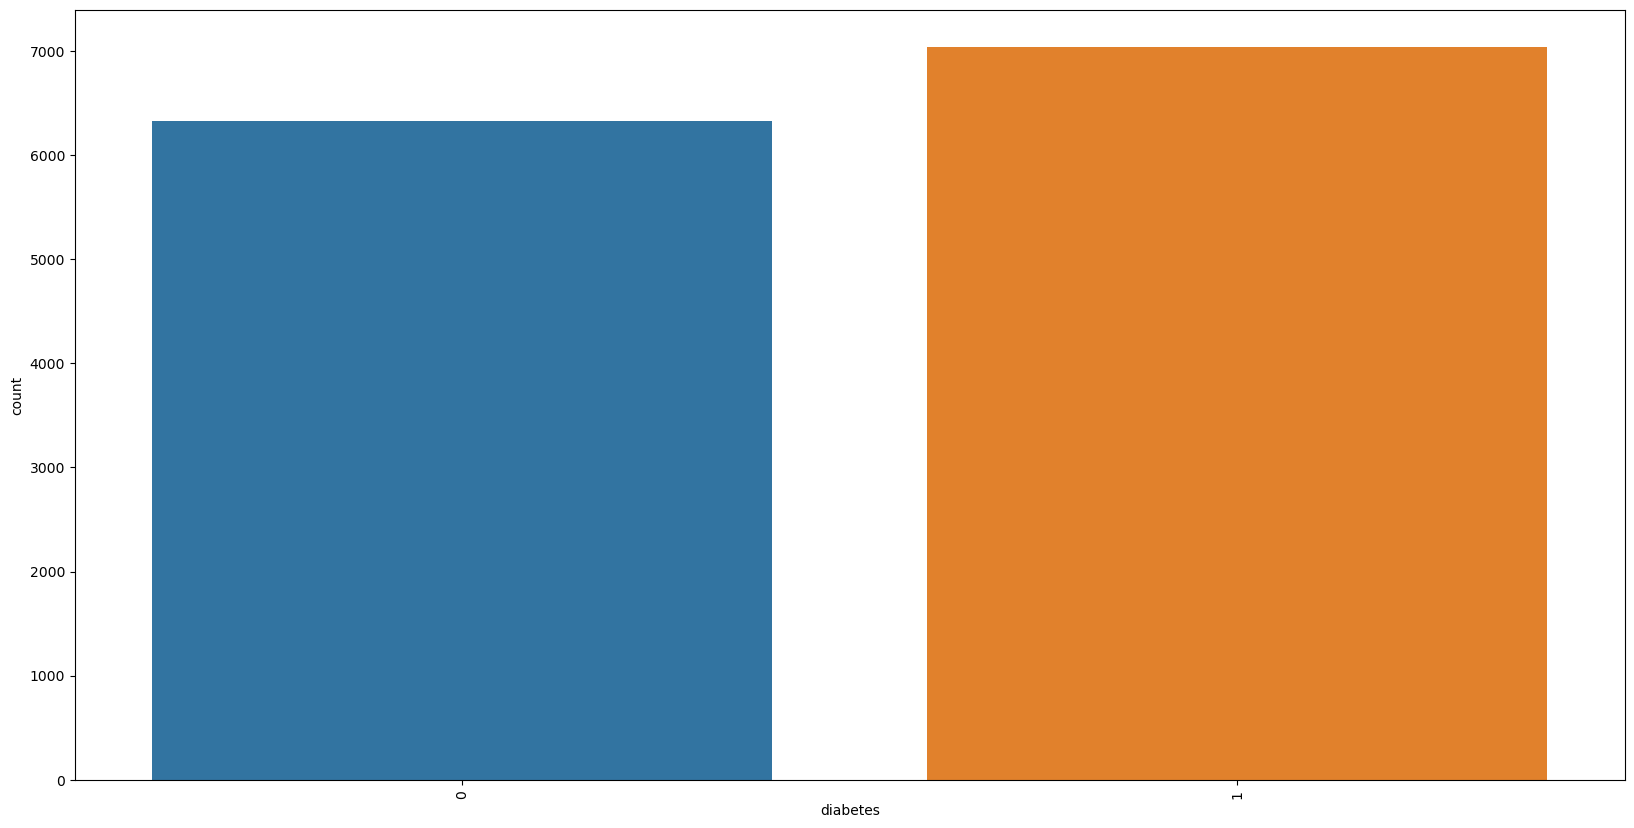

C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

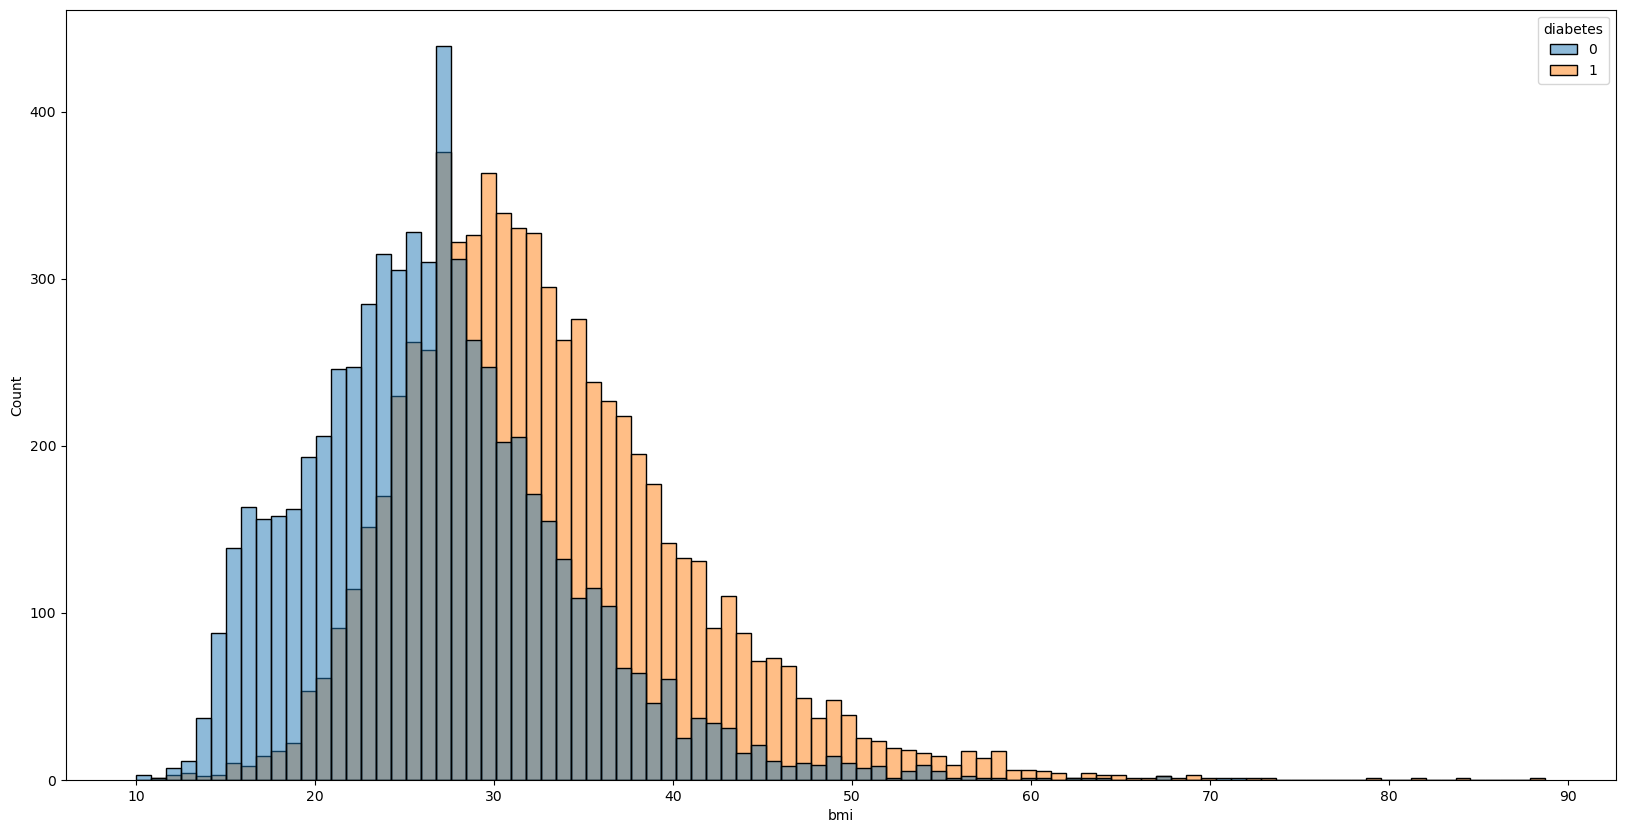

C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

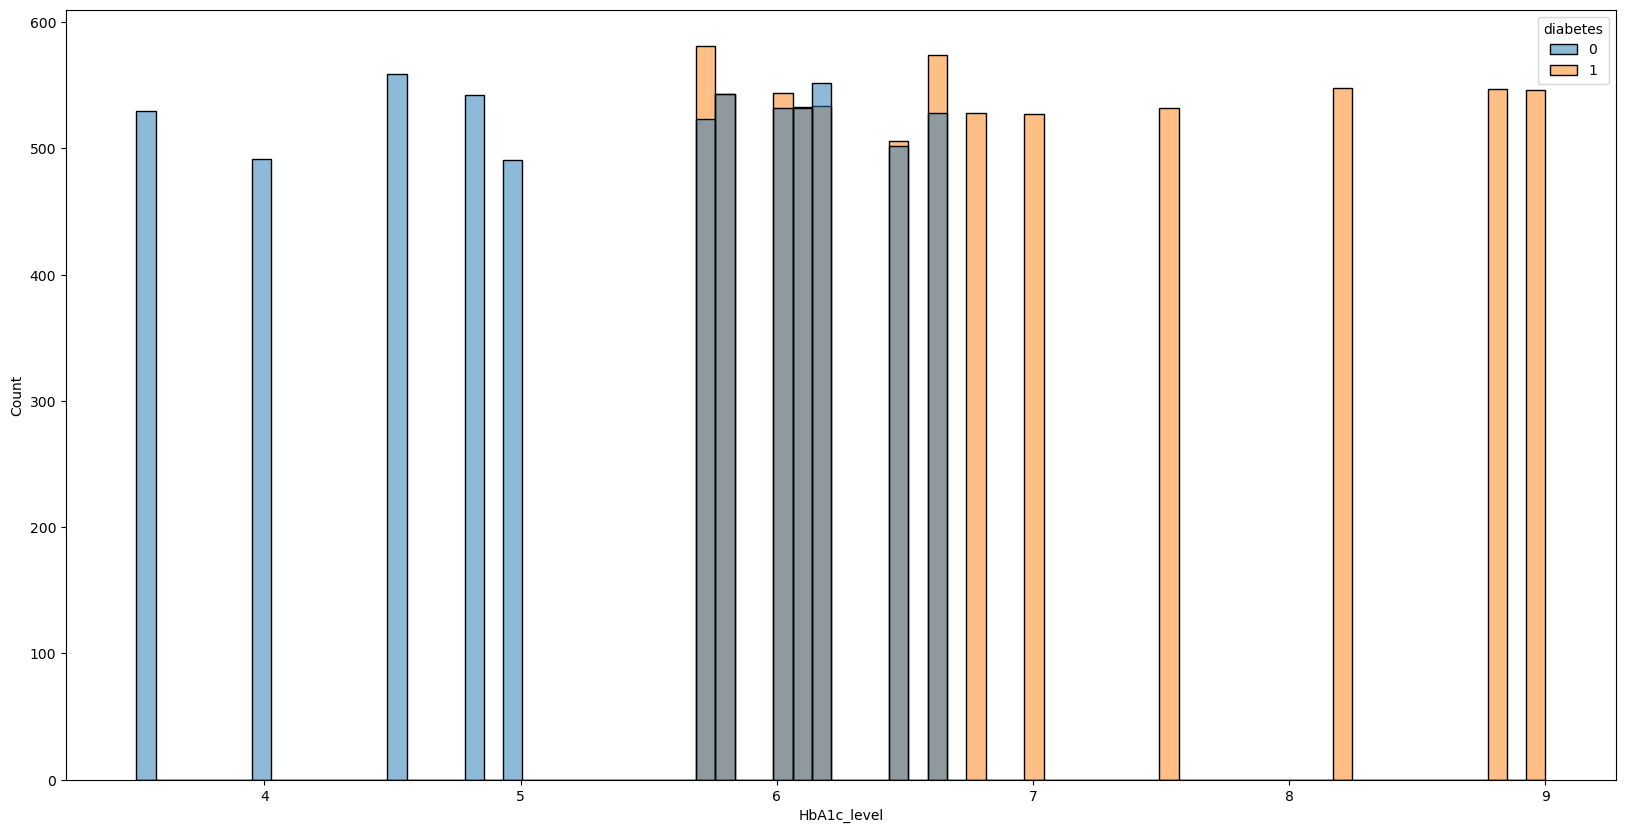

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='diabetes')
plt.xticks(rotation=90)
plt.show()

# Histogram of bmi
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='bmi', hue='diabetes')
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='HbA1c_level', hue='diabetes')
plt.show()

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
age,1.000000,0.250049,0.258654,0.295304,0.287752,0.266335,0.492504,0.010341,0.255984
hypertension,0.250049,1.000000,0.095290,0.161817,0.156081,0.138738,0.254985,0.013073,0.104558
heart_disease,0.258654,0.095290,1.000000,0.047656,0.131830,0.111678,0.209308,0.098194,0.022269
bmi,0.295304,0.161817,0.047656,1.000000,0.220959,0.201817,0.378153,-0.033208,0.170994
HbA1c_level,0.287752,0.156081,0.131830,0.220959,1.000000,0.319766,0.599833,0.044830,0.100759
blood_glucose_level,0.266335,0.138738,0.111678,0.201817,0.319766,1.000000,0.538976,0.039169,0.080913
diabetes,0.492504,0.254985,0.209308,0.378153,0.599833,0.538976,1.000000,0.073446,0.167452
gender_encoded,0.010341,0.013073,0.098194,-0.033208,0.044830,0.039169,0.073446,1.000000,-0.060140
smoking_history_encoded,0.255984,0.104558,0.022269,0.170994,0.100759,0.080913,0.167452,-0.060140,1.000000


In [18]:
# Split data into test and train
train, test = train_test_split(df, test_size=0.3, random_state=42)


# Split data into X and y

X_train = train[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_train = train['diabetes']

X_test = test[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_test = test['diabetes']

In [19]:
model = Sequential(
    [
        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [20]:
# load model
#from tensorflow.keras.models import load_model
#model = load_model('diabetes_model_1500.keras')
#
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [21]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/1000
74/74 [==============================] - 3s 15ms/step - loss: 1.4940 - accuracy: 0.5823 - auc: 0.5968 - mean_squared_error: 0.2890 - val_loss: 0.6180 - val_accuracy: 0.6647 - val_auc: 0.7195 - val_mean_squared_error: 0.2146
Epoch 2/1000
74/74 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.6972 - auc: 0.7709 - mean_squared_error: 0.1976 - val_loss: 0.5559 - val_accuracy: 0.7105 - val_auc: 0.7901 - val_mean_squared_error: 0.1902
Epoch 3/1000
74/74 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7136 - auc: 0.7885 - mean_squared_error: 0.1882 - val_loss: 0.5559 - val_accuracy: 0.7038 - val_auc: 0.8069 - val_mean_squared_error: 0.1920
Epoch 4/1000
74/74 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7200 - auc: 0.7989 - mean_squared_error: 0.1831 - val_loss: 0.5318 - val_accuracy: 0.7215 - val_auc: 0.8033 - val_mean_squared_error: 0.1796
Epoch 5/1000
74/74 [==============================] - 0

126/126 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9045 - auc: 0.9731 - mean_squared_error: 0.0660


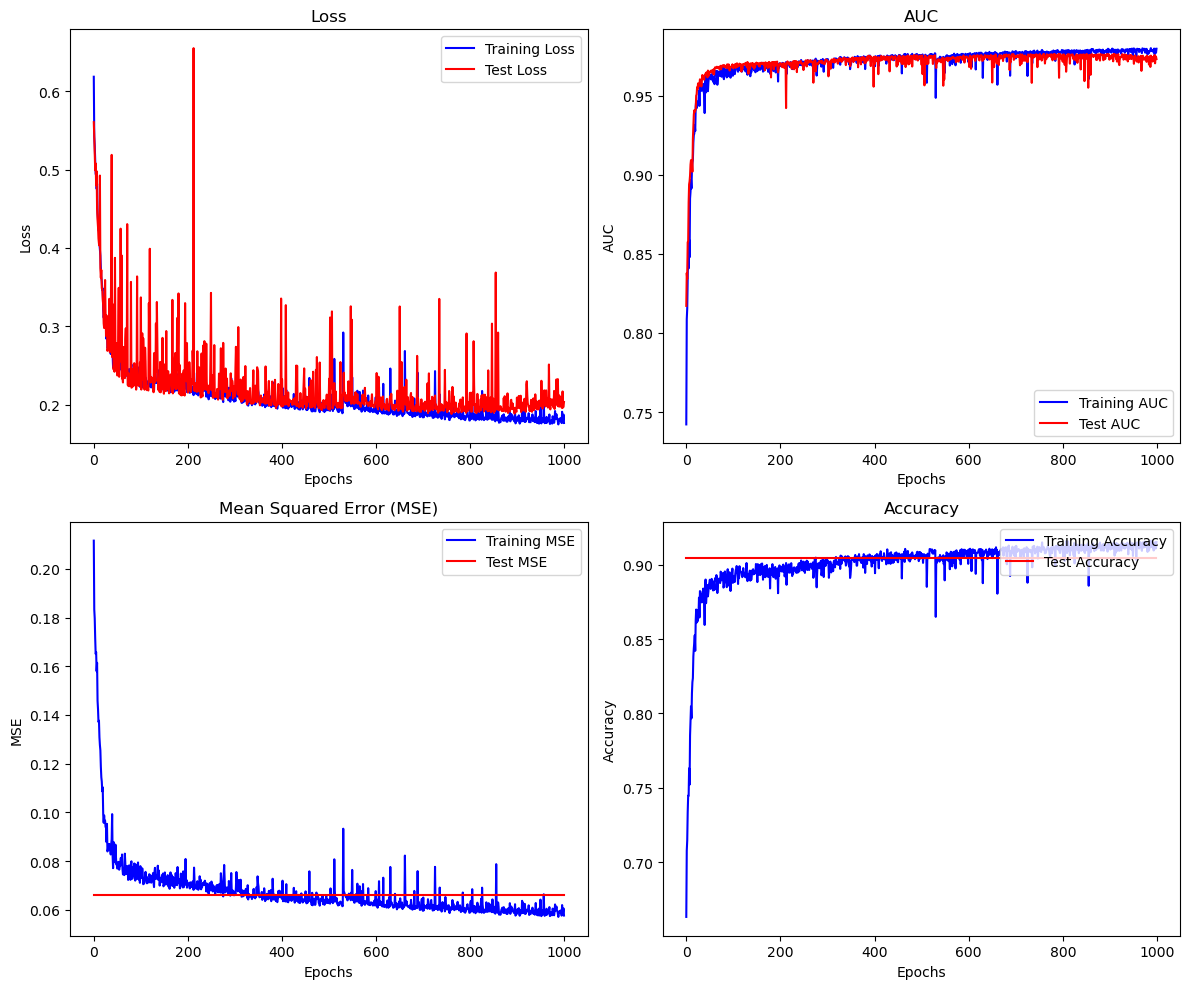

Test Loss: 0.20329250395298004


In [16]:
test_loss, test_accuracy, test_auc, test_mean_squared_error = model.evaluate(X_test, y_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training and Test Loss
axes[0, 0].plot(history.history["loss"], label='Training Loss', color='b')
axes[0, 0].plot(history.history["val_loss"], label='Test Loss', color='r')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(loc='upper right')

# Plot Training and Test AUC
axes[0, 1].plot(history.history["auc"], label='Training AUC', color='b')
axes[0, 1].plot(history.history["val_auc"], label='Test AUC', color='r')
axes[0, 1].set_title('AUC')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('AUC')
axes[0, 1].legend(loc='lower right')

# Plot Training and Test Mean Squared Error (MSE)
axes[1, 0].plot(history.history["mean_squared_error"], label='Training MSE', color='b')
axes[1, 0].plot([test_mean_squared_error] * len(history.history["mean_squared_error"]), label='Test MSE', color='r')
axes[1, 0].set_title('Mean Squared Error (MSE)')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend(loc='upper right')

# Plot Training and Test Accuracy
axes[1, 1].plot(history.history["accuracy"], label='Training Accuracy', color='b')
axes[1, 1].plot([test_accuracy] * len(history.history["accuracy"]), label='Test Accuracy', color='r')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()
print("Test Loss:", test_loss)

model.save("diabetes_model_1500.keras")


126/126 [==============================] - 1s 2ms/step
[[0.        ]
 [1.        ]
 [1.        ]
 ...
 [1.        ]
 [0.74445593]
 [1.        ]]


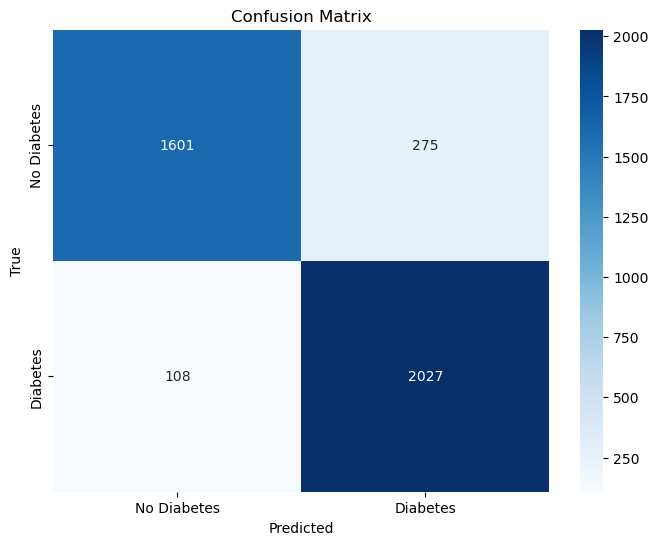

In [17]:
from sklearn.metrics import confusion_matrix

# Make predictions using your model on the test data
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)  # Threshold predictions to convert probabilities to binary values (0 or 1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#predict the first value of the dataset
print(model.predict(X_test[:1]))
print(y_test[:1])

In [ ]:
import shap

shap.initjs()

explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])
shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])

In [ ]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100,:], nsamples=500)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values50[0], X_train.iloc[50:100,:])

In [ ]:
import bz2
import pickle

with bz2.BZ2File("explainer.bz2", "wb") as file:
    pickle.dump(explainer, file)